# Model Selection with trees using R

## About the dataset

## Getting the data

In [12]:
library(RCurl)

download.file('ftp://ftp.cs.toronto.edu/pub/neuron/delve/data/tarfiles/adult.tar.gz', 'adult.tar.gz')

In [13]:
untar('adult.tar.gz')

In [21]:
adult_df <- read.csv(file = './adult/Dataset.data.gz', stringsAsFactor=T, header=F, sep=' ')

In [62]:
colnames(adult_df) <- c(
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "educational_num",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital_gain",
    "capital_loss",
    "hours_per_week",
    "native_country",
    "income"
)

In [63]:
head(adult_df)

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
6,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


## Exploratory Data Analysis

In [38]:
summary(adult_df)

      age                   workclass         fnlwgt       
 Min.   :17.00   Private         :33906   Min.   :  12285  
 1st Qu.:28.00   Self-emp-not-inc: 3862   1st Qu.: 117550  
 Median :37.00   Local-gov       : 3136   Median : 178144  
 Mean   :38.64   ?               : 2799   Mean   : 189664  
 3rd Qu.:48.00   State-gov       : 1981   3rd Qu.: 237642  
 Max.   :90.00   Self-emp-inc    : 1695   Max.   :1490400  
                 (Other)         : 1463                    
        education     educational_num               marital_status 
 HS-grad     :15784   Min.   : 1.00   Divorced             : 6633  
 Some-college:10878   1st Qu.: 9.00   Married-AF-spouse    :   37  
 Bachelors   : 8025   Median :10.00   Married-civ-spouse   :22379  
 Masters     : 2657   Mean   :10.08   Married-spouse-absent:  628  
 Assoc-voc   : 2061   3rd Qu.:12.00   Never-married        :16117  
 11th        : 1812   Max.   :16.00   Separated            : 1530  
 (Other)     : 7625                   Widowe

In [39]:
library(ggplot2)

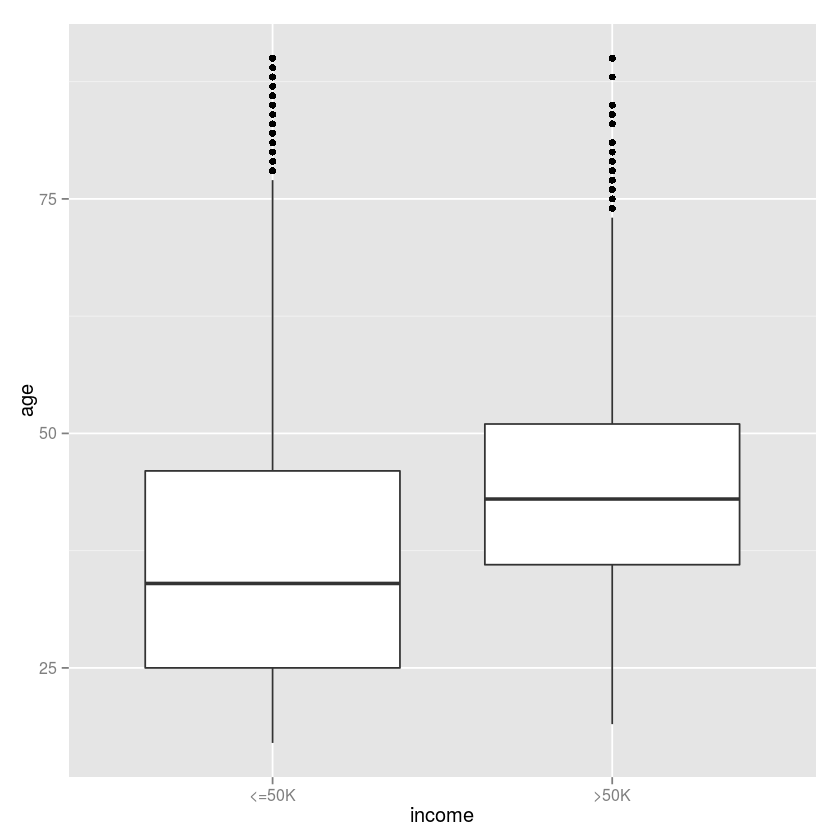

In [40]:
age_income_g <- ggplot(data=adult_df, aes(x=income,y=age))
age_income_g + geom_boxplot()

In [47]:
income_vs_country_table <- table(adult_df$native_country, adult_df$income)

In [58]:
income_vs_country_df <- as.data.frame.matrix(income_vs_country_table)
income_vs_country_df$ratio <- income_vs_country_df[,'<=50K'] / income_vs_country_df[,'>50K']

In [61]:
income_vs_country_df[with(income_vs_country_df, order(-ratio)),]

,<=50K,>50K,ratio
Holand-Netherlands,1,0,Inf
Guatemala,85,3,28.33333
Outlying-US(Guam-USVI-etc),22,1,22
Columbia,81,4,20.25
Dominican-Republic,98,5,19.6
Mexico,904,47,19.23404
Nicaragua,46,3,15.33333
El-Salvador,144,11,13.09091
Trinadad&Tobago,25,2,12.5
Vietnam,79,7,11.28571


In [71]:
gender_income_df <- as.data.frame.matrix(table(adult_df$gender, adult_df$income))
gender_income_df$ratio <- gender_income_df[,1] / gender_income_df[,2]
gender_income_df[with(gender_income_df, order(-ratio)),]

,<=50K,>50K,ratio
Female,14423,1769,8.153194
Male,22732,9918,2.291994


In [73]:
race_income_df <- as.data.frame.matrix(table(adult_df$race, adult_df$income))
race_income_df$ratio <- race_income_df[,1] / race_income_df[,2]
race_income_df[with(race_income_df, order(-ratio)),]

,<=50K,>50K,ratio
Amer-Indian-Eskimo,415,55,7.545455
Black,4119,566,7.277385
Other,356,50,7.12
White,31155,10607,2.937211
Asian-Pac-Islander,1110,409,2.713936


In [75]:
education_income_df <- as.data.frame.matrix(table(adult_df$education, adult_df$income))
education_income_df$ratio <- education_income_df[,1] / education_income_df[,2]
education_income_df[with(education_income_df, order(-ratio)),]

,<=50K,>50K,ratio
Preschool,82,1,82
1st-4th,239,8,29.875
11th,1720,92,18.69565
5th-6th,482,27,17.85185
9th,715,41,17.43902
10th,1302,87,14.96552
7th-8th,893,62,14.40323
12th,609,48,12.6875
HS-grad,13281,2503,5.306033
Some-college,8815,2063,4.272904


## Building a tree model

In [86]:
library(rpart)
library(rpart.plot)

In [114]:
income_cart <- rpart(
    income~age+education+race+gender+native_country+marital_status+occupation, 
    data=adult_df, method="class",minbucket=5)

## Model visualisation

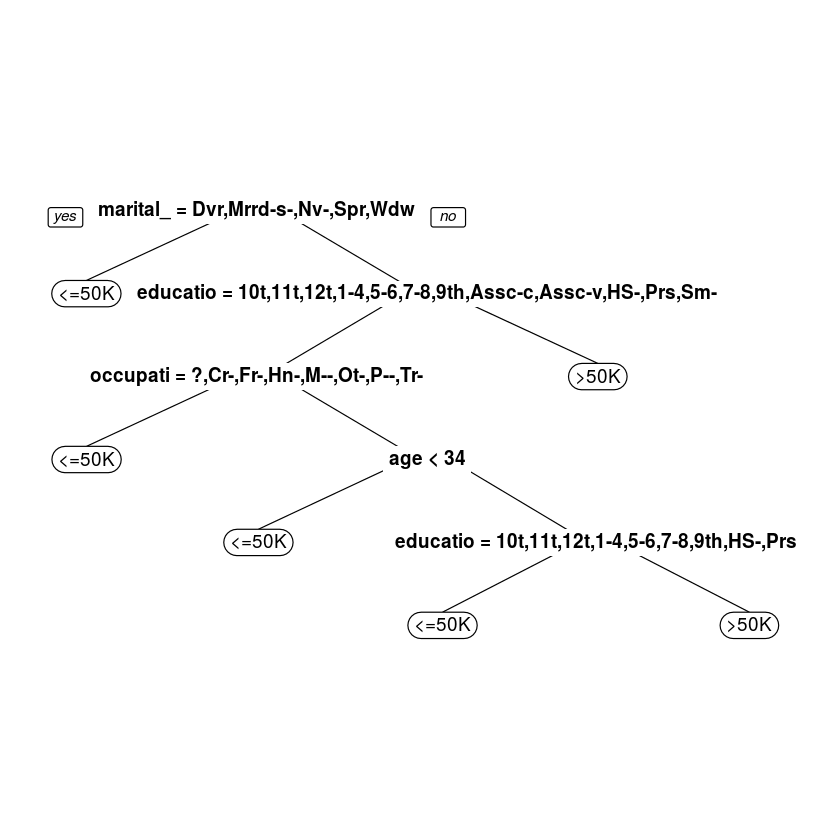

In [115]:
prp(income_cart)

### Who is over 50K?